<a href="https://colab.research.google.com/github/khushipr/Parameter_Optimization_of_SVM/blob/main/Parameter_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import files
uploaded = files.upload()

Saving ai4i2020.csv to ai4i2020 (2).csv


###Uploading the Dataset from UCI Library

In [5]:
dataset = pd.read_csv('ai4i2020.csv')
dataset.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


###Pre-Processing of Dataset

In [6]:
dataset.shape

(10000, 14)

In [7]:
dataset.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [8]:
dataset = dataset.drop(['Type','Product ID'],axis=1)

<Axes: xlabel='Rotational speed [rpm]', ylabel='count'>

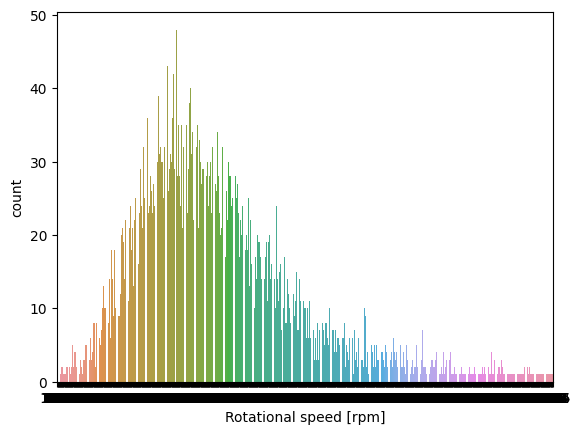

In [9]:
sns.countplot(x = 'Rotational speed [rpm]', data=dataset)

In [10]:
X = dataset.iloc[:,0:-1]
y = dataset['Rotational speed [rpm]']

In [11]:
ss = StandardScaler()
ss.fit_transform(X)

array([[-1.73187761, -0.95238944, -0.94735989, ..., -0.10786004,
        -0.09793424, -0.09948362],
       [-1.7315312 , -0.90239341, -0.879959  , ..., -0.10786004,
        -0.09793424, -0.09948362],
       [-1.73118479, -0.95238944, -1.01476077, ..., -0.10786004,
        -0.09793424, -0.09948362],
       ...,
       [ 1.73118479, -0.50242514, -0.94735989, ..., -0.10786004,
        -0.09793424, -0.09948362],
       [ 1.7315312 , -0.50242514, -0.879959  , ..., -0.10786004,
        -0.09793424, -0.09948362],
       [ 1.73187761, -0.50242514, -0.879959  , ..., -0.10786004,
        -0.09793424, -0.09948362]])

###Creation of 10 samples with 70-30 ratio of Training and Testing Set

In [12]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [13]:
samples

[(       UDI  Air temperature [K]  Process temperature [K]  \
  7681  7682                300.7                    311.8   
  9031  9032                297.5                    308.4   
  3691  3692                302.1                    311.2   
  202    203                298.4                    308.5   
  5625  5626                302.7                    312.1   
  ...    ...                  ...                      ...   
  9225  9226                298.0                    309.1   
  4859  4860                303.7                    312.4   
  3264  3265                301.3                    310.1   
  9845  9846                298.3                    309.1   
  2732  2733                299.7                    309.2   
  
        Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
  7681                    1443         43.7              217                0   
  9031                    1793         23.9               28                0   
  3691    

### Creation of a Fitness Function

In [14]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

In [15]:
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

### Calling the Function for Every Sample

In [16]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  0.1 Best Kernel =  linear Best Nu =  5.48 Best Epsilon =  8.74
Best Accuracy =  0.09 Best Kernel =  linear Best Nu =  1.15 Best Epsilon =  9.04
Best Accuracy =  0.08 Best Kernel =  linear Best Nu =  8.96 Best Epsilon =  7.79
Best Accuracy =  0.1 Best Kernel =  linear Best Nu =  2.22 Best Epsilon =  0.44
Best Accuracy =  0.1 Best Kernel =  linear Best Nu =  0.53 Best Epsilon =  1.77
Best Accuracy =  0.09 Best Kernel =  linear Best Nu =  8.78 Best Epsilon =  9.85
Best Accuracy =  0.1 Best Kernel =  linear Best Nu =  3.16 Best Epsilon =  3.09
Best Accuracy =  0.11 Best Kernel =  linear Best Nu =  1.62 Best Epsilon =  2.07
Best Accuracy =  0.1 Best Kernel =  linear Best Nu =  5.52 Best Epsilon =  8.2
Best Accuracy =  0.11 Best Kernel =  linear Best Nu =  0.13 Best Epsilon =  0.51


###Creation of a Result Table

In [17]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.10,linear,5.48,8.74
1,2,0.09,linear,1.15,9.04
2,3,0.08,linear,8.96,7.79
3,4,0.10,linear,2.22,0.44
4,5,0.10,linear,0.53,1.77
5,6,0.09,linear,8.78,9.85
6,7,0.10,linear,3.16,3.09
7,8,0.11,linear,1.62,2.07
8,9,0.10,linear,5.52,8.20
9,10,0.11,linear,0.13,0.51


### Plotting of the Convergence Graph/Linear Curve

In [18]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()], 
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

In [ ]:
train_sizes

array([  63,  192,  321,  450,  579,  708,  837,  966, 1095, 1224, 1353,
       1481, 1610, 1739, 1868, 1997, 2126, 2255, 2384, 2513, 2642, 2771,
       2900, 3029, 3157, 3286, 3415, 3544, 3673, 3802, 3931, 4060, 4189,
       4318, 4447, 4576, 4705, 4833, 4962, 5091, 5220, 5349, 5478, 5607,
       5736, 5865, 5994, 6123, 6252, 6381])

In [ ]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

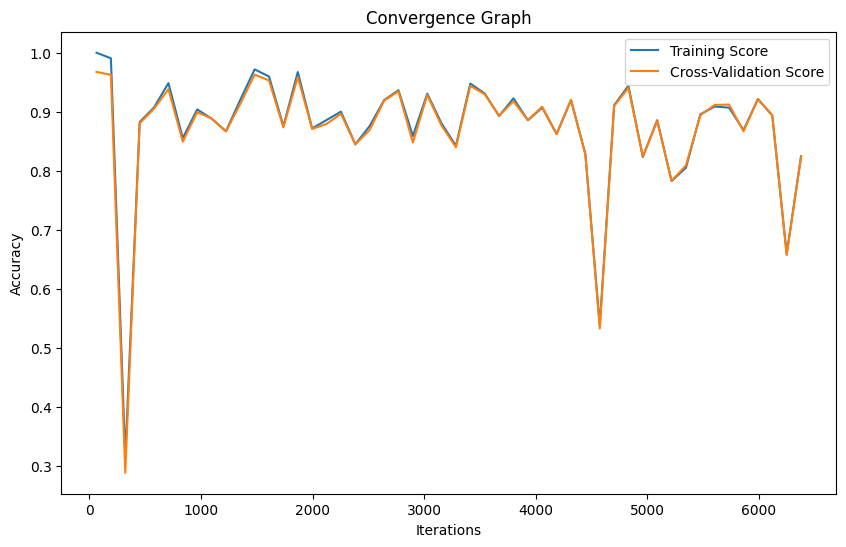

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()